# Goals for this coding session
## Why
* we've loaded 3-1-1 service requests (18gb CSV from https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 ) into duckdb database
* we've loaded zulip chat data into duckdb database 
* we've learned about visualization from ismael
* we've learned about metadata + documentation from pascal
* we are ready to learn the **how** of doing what they suggest end-to-end in as little time as possible

## Tasks (planning)
- [x] review notebook with overview of `dbt`: https://github.com/onefact/datathinking.org-codespace/blob/main/notebooks/in-class-notebooks/230406-data-build-tool-for-new-york-city-311-phone-call-data.ipynb
- [ ] (maybe) review best practices for documenting data from pascal's guest lecture (backup: model cards and data cards references: https://modelcards.withgoogle.com/about, https://arxiv.org/pdf/1810.03993.pdf)
  - [ ] https://nada.ihsn.org/
- [x] execute `dbt run` to test the code from last time we did this
- [x] `dbt test` to build the data model
- [x] modify the data model for 311 call data becase the `.sql` file does not match what we figured out with a lot of help (https://github.com/onefact/datathinking.org-codespace/blob/main/notebooks/in-class-notebooks/230420-debugging-duckdb-altair-falcon-3-1-1-service-requests.ipynb)
- [ ] test this modification with the same code we used to test the `dbt run` code
- [ ] modify the data model to include the zulip chat data
- [ ] `dbt docs generate` to generate the data model documentation
- [ ] `dbt docs serve` to serve the data model documentation
- [ ] serve the data model with `dbt docs serve`
- [ ] post the data model at `https://data.datathinking.org/311-nyc/`

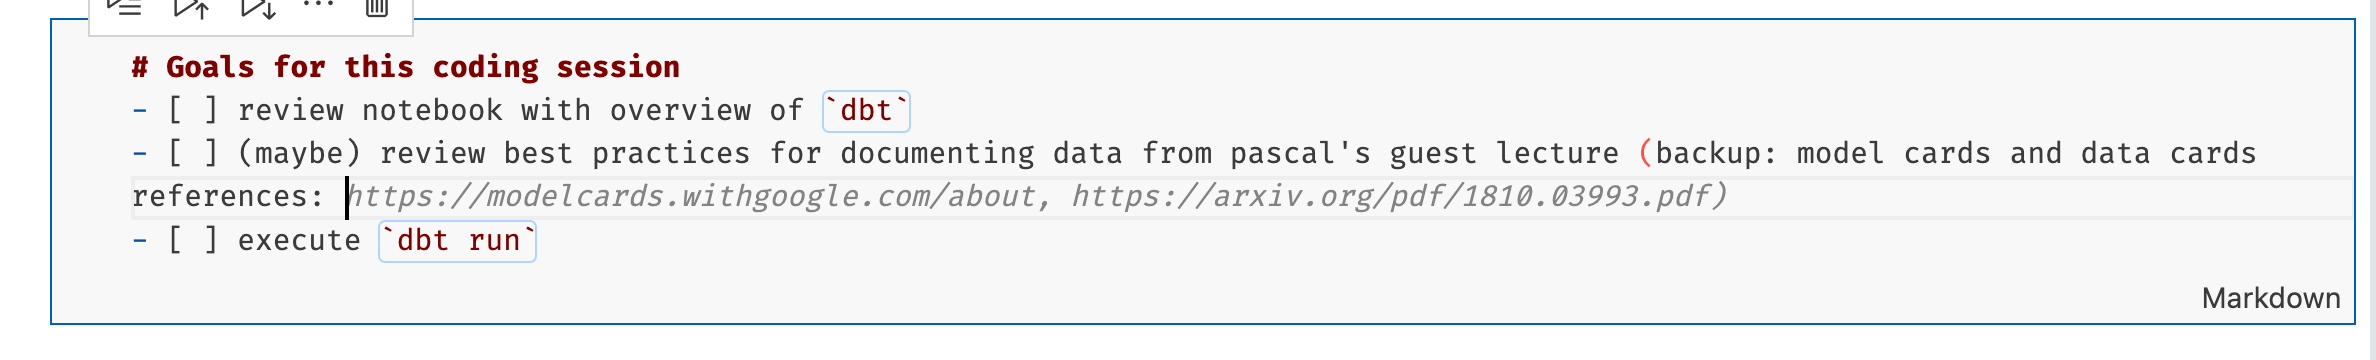

# Try running `dbt run`

had to run this in shell: 

```
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main     main   conda activate datathinking.org
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main     main    dbt run                   3752  10:28:52  
14:28:56  Encountered an error:
Runtime Error
  fatal: Not a dbt project (or any of the parent directories). Missing dbt_project.yml file
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main     main    cd data_build_tool_for_processing_data 
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data     main    dbt run
14:29:19  Encountered an error:
Runtime Error
  fatal: Not a dbt project (or any of the parent directories). Missing dbt_project.yml file
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data     main    cd datathinking 
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data/datathinking     main    dbt run
14:29:50  Running with dbt=1.4.5
14:29:50  [WARNING]: Configuration paths exist in your dbt_project.yml file which do not apply to any resources.
There are 1 unused configuration paths:
- models.datathinking.example
14:29:50  Found 1 model, 0 tests, 0 snapshots, 0 analyses, 297 macros, 0 operations, 0 seed files, 0 sources, 0 exposures, 0 metrics
14:29:50  
14:29:51  Concurrency: 1 threads (target='dev')
14:29:51  
14:29:51  1 of 1 START sql view model main.new_york_city_311_calls ....................... [RUN]
14:29:51  1 of 1 OK created sql view model main.new_york_city_311_calls .................. [OK in 0.15s]
14:29:51  
14:29:51  Finished running 1 view model in 0 hours 0 minutes and 0.42 seconds (0.42s).
14:29:51  
14:29:51  Completed successfully
14:29:51  
14:29:51  Done. PASS=1 WARN=0 ERROR=0 SKIP=0 TOTAL=1
```

Check that what we expect to happen from the last time we did this, happens again, that the file at `/tmp/dbt.duckdb` is created/overwritten:

```
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data/datathinking     main    ls -l /tmp/dbt.duckdb
-rw-r--r--  1 me  wheel  274432 Apr 24 10:29 /tmp/dbt.duckdb
```

In [1]:
import duckdb

con = duckdb.connect("/tmp/dbt.duckdb")

con.execute("SELECT * FROM new_york_city_311_calls LIMIT 10").fetchall()

[(34247134,
  '09/04/2016 02:35:29 PM',
  '09/07/2016 03:50:31 PM',
  'DPR',
  'Department of Parks and Recreation',
  'Maintenance or Facility',
  'Hours of Operation',
  'Beach',
  '11235',
  None,
  None,
  'W. 37TH STREET',
  'CORBIN PLACE',
  None,
  None,
  None,
  'BROOKLYN',
  None,
  'N/A',
  'Closed',
  '09/07/2016 02:35:29 PM',
  'The Department of Parks and Recreation has completed the requested work order and corrected the problem.',
  '09/07/2016 03:50:31 PM',
  'Unspecified BROOKLYN',
  None,
  'BROOKLYN',
  None,
  None,
  'PHONE',
  'Beach - Coney Island',
  'BROOKLYN',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (34250114,
  '09/05/2016 03:47:42 PM',
  '09/07/2016 03:47:11 PM',
  'DOF',
  'Land Records',
  'DOF Property - Update Account',
  'Billing Name Incorrect',
  'Property Address',
  '11224',
  None,
  None,
  None,
  None,
  None,
  None,
  'ADDRESS',
  'BROOKLYN',
  None,
  'N/A',
  'Closed',
  '09/15/2016 03:47:42 PM',
  

# Try running `dbt test`

```
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data/datathinking     main    dbt test
14:37:19  Running with dbt=1.4.5
14:37:19  [WARNING]: Configuration paths exist in your dbt_project.yml file which do not apply to any resources.
There are 1 unused configuration paths:
- models.datathinking.example
14:37:19  Found 1 model, 0 tests, 0 snapshots, 0 analyses, 297 macros, 0 operations, 0 seed files, 0 sources, 0 exposures, 0 metrics
14:37:19  
14:37:19  Nothing to do. Try checking your model configs and model specification args
```

# Try modifying the data model for 311 call data

following https://github.com/onefact/datathinking.org-codespace/blob/main/notebooks/in-class-notebooks/230420-debugging-duckdb-altair-falcon-3-1-1-service-requests.ipynb

- had to install visual studio code duckdb syntax tool: https://marketplace.visualstudio.com/items?itemName=RandomFractalsInc.duckdb-sql-tools

# Test the modification

## Debug error - lock on file `.duckdb` 

```
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data/datathinking     main    dbt run 
14:43:56  Running with dbt=1.4.5
14:43:56  [WARNING]: Configuration paths exist in your dbt_project.yml file which do not apply to any resources.
There are 1 unused configuration paths:
- models.datathinking.example
14:43:56  Found 2 models, 0 tests, 0 snapshots, 0 analyses, 297 macros, 0 operations, 0 seed files, 0 sources, 0 exposures, 0 metrics
14:43:56  
14:43:56  
14:43:56  Finished running  in 0 hours 0 minutes and 0.01 seconds (0.01s).
14:43:57  Encountered an error:
Runtime Error
  IO Error: Could not set lock on file "/tmp/dbt.duckdb": Resource temporarily unavailable
  ```

In [2]:
con.close()

## Try running dbt run again

```
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data/datathinking     main    dbt run 
14:44:36  Running with dbt=1.4.5
14:44:36  [WARNING]: Configuration paths exist in your dbt_project.yml file which do not apply to any resources.
There are 1 unused configuration paths:
- models.datathinking.example
14:44:36  Found 2 models, 0 tests, 0 snapshots, 0 analyses, 297 macros, 0 operations, 0 seed files, 0 sources, 0 exposures, 0 metrics
14:44:36  
14:44:36  Concurrency: 1 threads (target='dev')
14:44:36  
14:44:36  1 of 1 START sql view model main.new_york_city_311_calls ....................... [RUN]
14:44:36  1 of 1 OK created sql view model main.new_york_city_311_calls .................. [OK in 0.09s]
14:44:36  
14:44:36  Finished running 1 view model in 0 hours 0 minutes and 0.33 seconds (0.33s).
14:44:36  
14:44:36  Completed successfully
14:44:36  
14:44:36  Done. PASS=1 WARN=0 ERROR=0 SKIP=0 TOTAL=1
```

In [3]:
import duckdb

con = duckdb.connect("/tmp/dbt.duckdb")

con.execute("SELECT * FROM new_york_city_311_calls LIMIT 10").fetchall()

[(34247134,
  '09/04/2016 02:35:29 PM',
  '09/07/2016 03:50:31 PM',
  'DPR',
  'Department of Parks and Recreation',
  'Maintenance or Facility',
  'Hours of Operation',
  'Beach',
  '11235',
  None,
  None,
  'W. 37TH STREET',
  'CORBIN PLACE',
  None,
  None,
  None,
  'BROOKLYN',
  None,
  'N/A',
  'Closed',
  '09/07/2016 02:35:29 PM',
  'The Department of Parks and Recreation has completed the requested work order and corrected the problem.',
  '09/07/2016 03:50:31 PM',
  'Unspecified BROOKLYN',
  None,
  'BROOKLYN',
  None,
  None,
  'PHONE',
  'Beach - Coney Island',
  'BROOKLYN',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (34250114,
  '09/05/2016 03:47:42 PM',
  '09/07/2016 03:47:11 PM',
  'DOF',
  'Land Records',
  'DOF Property - Update Account',
  'Billing Name Incorrect',
  'Property Address',
  '11224',
  None,
  None,
  None,
  None,
  None,
  None,
  'ADDRESS',
  'BROOKLYN',
  None,
  'N/A',
  'Closed',
  '09/15/2016 03:47:42 PM',
  

In [4]:
# check how big /tmp/dbt.duckdb is in megabytes



check how big the file is in megabytes:

```
ls -l --block-size=M
```

In [5]:
!ls -l --block-size=M /tmp/dbt.duckdb

ls: unrecognized option `--block-size=M'
usage: ls [-@ABCFGHILOPRSTUWabcdefghiklmnopqrstuvwxy1%,] [--color=when] [-D format] [file ...]


https://stackoverflow.com/questions/25454857/show-human-readable-file-sizes-in-osx-terminal

In [6]:
!ls -hl /tmp/dbt.duckdb

-rw-r--r--  1 me  wheel   1.3M Apr 24 10:44 /tmp/dbt.duckdb


## Debugging: file size is 1.3M, is that too small? 

Try to look at total number of rows

In [7]:
import duckdb

con = duckdb.connect("/tmp/dbt.duckdb")

con.execute("SELECT COUNT(*) FROM new_york_city_311_calls LIMIT 100000").fetchall()

: 

: 

In [2]:
# get size of parquet file after modifying `profiles.yml`
!ls -lh /tmp/new_york_city_311_calls.parquet

-rw-r--r--  1 me  wheel   268K Apr 24 10:50 /tmp/new_york_city_311_calls.parquet


In [ ]:
# count number of rows in the table
